# IMPORTANT: MODIFY these USER PARAMETERS BEFORE STARTING

In [1]:
# Are you a first time user of this script?
# Replace with False if you're not, then the script will not check if you have the libraries installed.
# it saves time on execution
firstTimeUser = False

In [2]:
# Replace with your first name. This value is used to import the recorded words
username = "cuong"

In [3]:
# Name of file with the recorded sentence
# Leave empty if you would like to record a new one
inputFile = "sentence-2022-11-12_214600.wav"

# Download and Install the Necessary Software Libraries

In [4]:
import sys
if firstTimeUser:
    !{sys.executable} -m pip install sounddevice
    !{sys.executable} -m pip install soundfile
    !{sys.executable} -m pip install matplotlib
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install scipy

# Import those Libraries into the Script

In [43]:
import os
import sounddevice as sd
import soundfile as sf
from scipy.signal import hilbert
from scipy.io.wavfile import write
from scipy.io import wavfile
import importlib

In [6]:
import Text2Speech_module
from Text2Speech_module import *

In [7]:
importlib.reload(Text2Speech_module)

<module 'Text2Speech_module' from 'C:\\Users\\cuong\\Documents\\GitHub\\Text2Speech\\Text2Speech_module.py'>

In [8]:
# Matplotlib settings to make the plots look a little nicer.

%matplotlib inline

plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['figure.figsize'] = (10,6)

# Word Bank

In [9]:
wordBank = ['and', 'brown', 'do', 'dog', 'educated', 'eggs', 'fox', 'green', 'ham', 'I', 'jumped', 'lazy', 'like', 'mother', 'nachos', 'not', 'our', 'over', 'quick', 'served', 'the', 'us', 'very']

# Import or Create the Voice Library according to User

In [10]:
if username not in os.listdir():
    os.mkdir(username)

voiceLib = username
print("User selected voice library: ", voiceLib)

User selected voice library:  cuong


In [11]:
wordIndex = 0
availableWords = getAvailableWords(voiceLib)
if set(wordBank) != set(availableWords):
    input("Detected missing words on record! Please input any letter when you are ready to record!")
while set(wordBank) != set(availableWords):
    word = wordBank[wordIndex]
    if wordBank[wordIndex] not in availableWords:
        print(word, " not in dir")
        recordWord(voiceLib, word)
    availableWords = getAvailableWords(voiceLib)
    wordIndex += 1

In [17]:
# playAvailableWords(voiceLib)

# Import or Create the Sentence according to User Selection

In [12]:
if inputFile == "":
    input("Please input any letter when you are ready to record the sentence!")
    inputFile = recordSentence()

# Plot the time-domain waveform and a spectrogram of the record sentence

In [20]:
# Extract data and sampling rate from file 
fs, sentence = wavfile.read(inputFile)
print('Sample Rate: {!s} samples/sec'.format(fs))

# Create a time vector
t_sentence = np.arange(len(sentence)) * (1./fs)

Sample Rate: 48000 samples/sec


In [185]:
sd.play(sentence, fs)

In [22]:
normalized_sentence = norm(sentence)

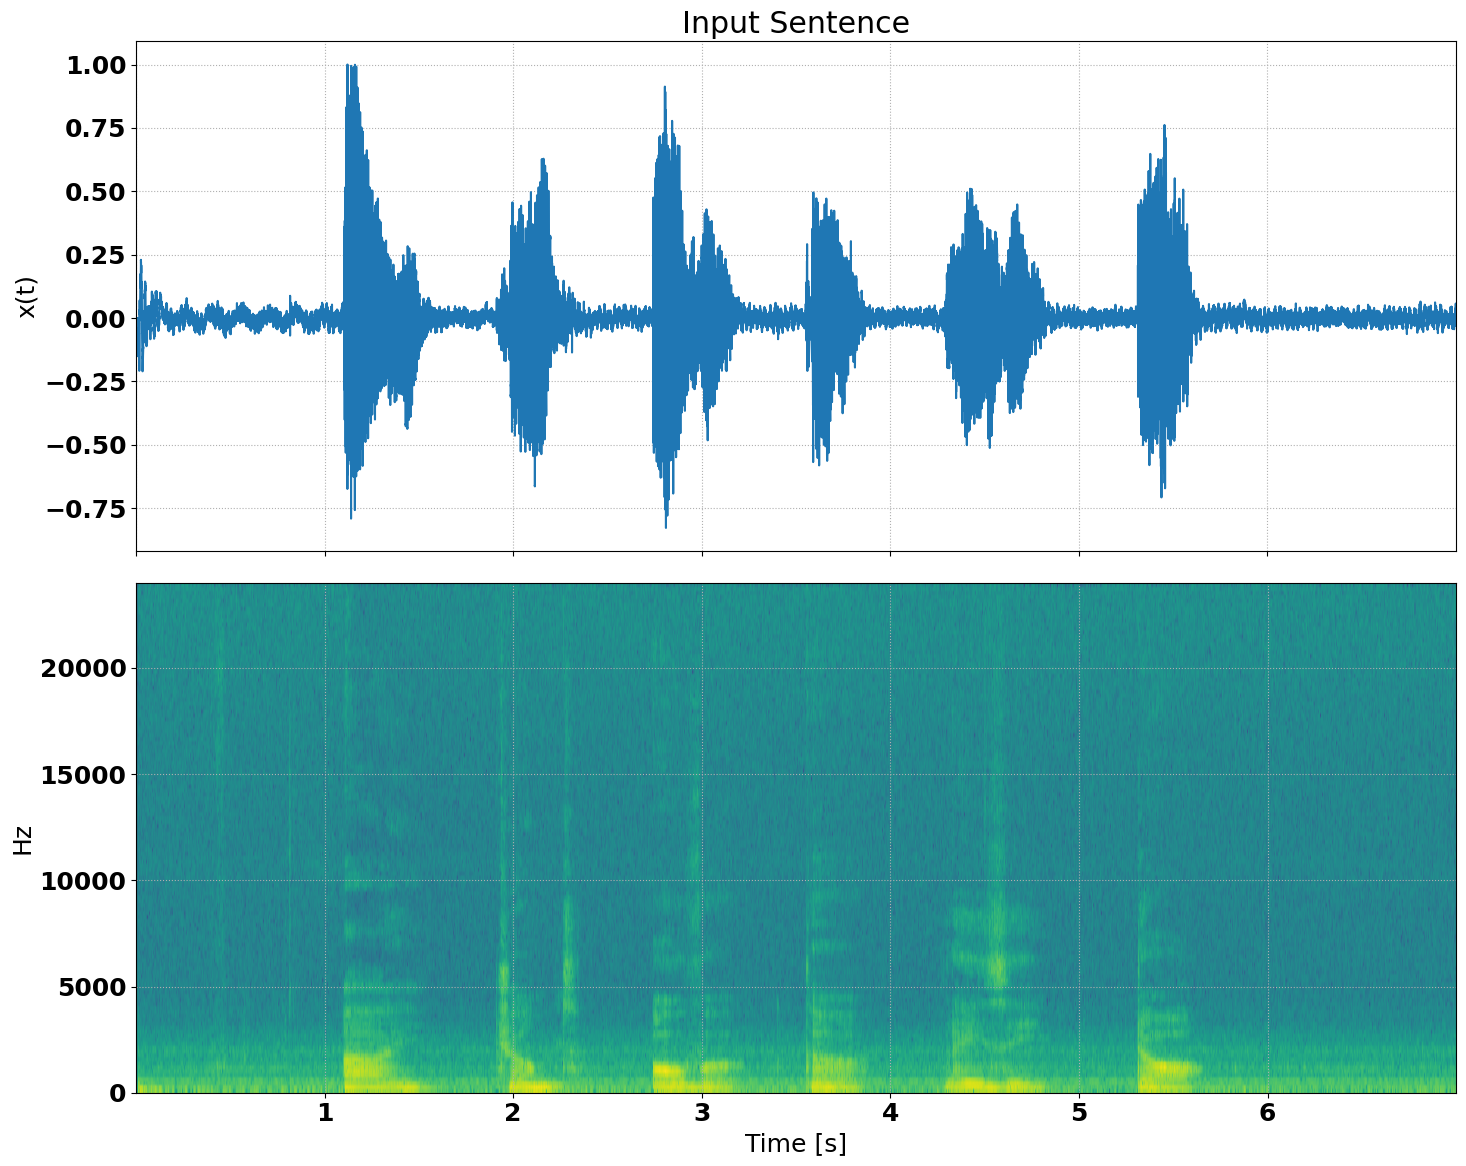

In [23]:
plot_signal(t_sentence, normalized_sentence, title="Input Sentence")

# Working Area

In [132]:
def findEnvelope(data):
    envelope = hilbert(data)
    return np.abs(envelope)

In [133]:
def findStartOfWord(t, envelope):
    return t[np.min(np.argwhere(envelope>np.std(envelope)))]

In [134]:
def findEndOfWord(t, envelope):
    return t[np.max(np.argwhere(envelope>np.std(envelope)))]

In [177]:
fs, over_data = wavfile.read('cuong/dog.wav')

# Create a time vector
t_over = np.arange(len(over_data)) * (1./fs)

In [178]:
normalized_over = norm(over_data)

In [179]:
amplitude_envelope = findEnvelope(normalized_over)

In [180]:
print(findStartOfWord(t_over, amplitude_envelope))
print(findEndOfWord(t_over, amplitude_envelope))
normalized_over, t_over = extract(normalized_over, findStartOfWord(t_over, amplitude_envelope), findEndOfWord(t_over, amplitude_envelope), fs)

1.2965
1.6849583333333333


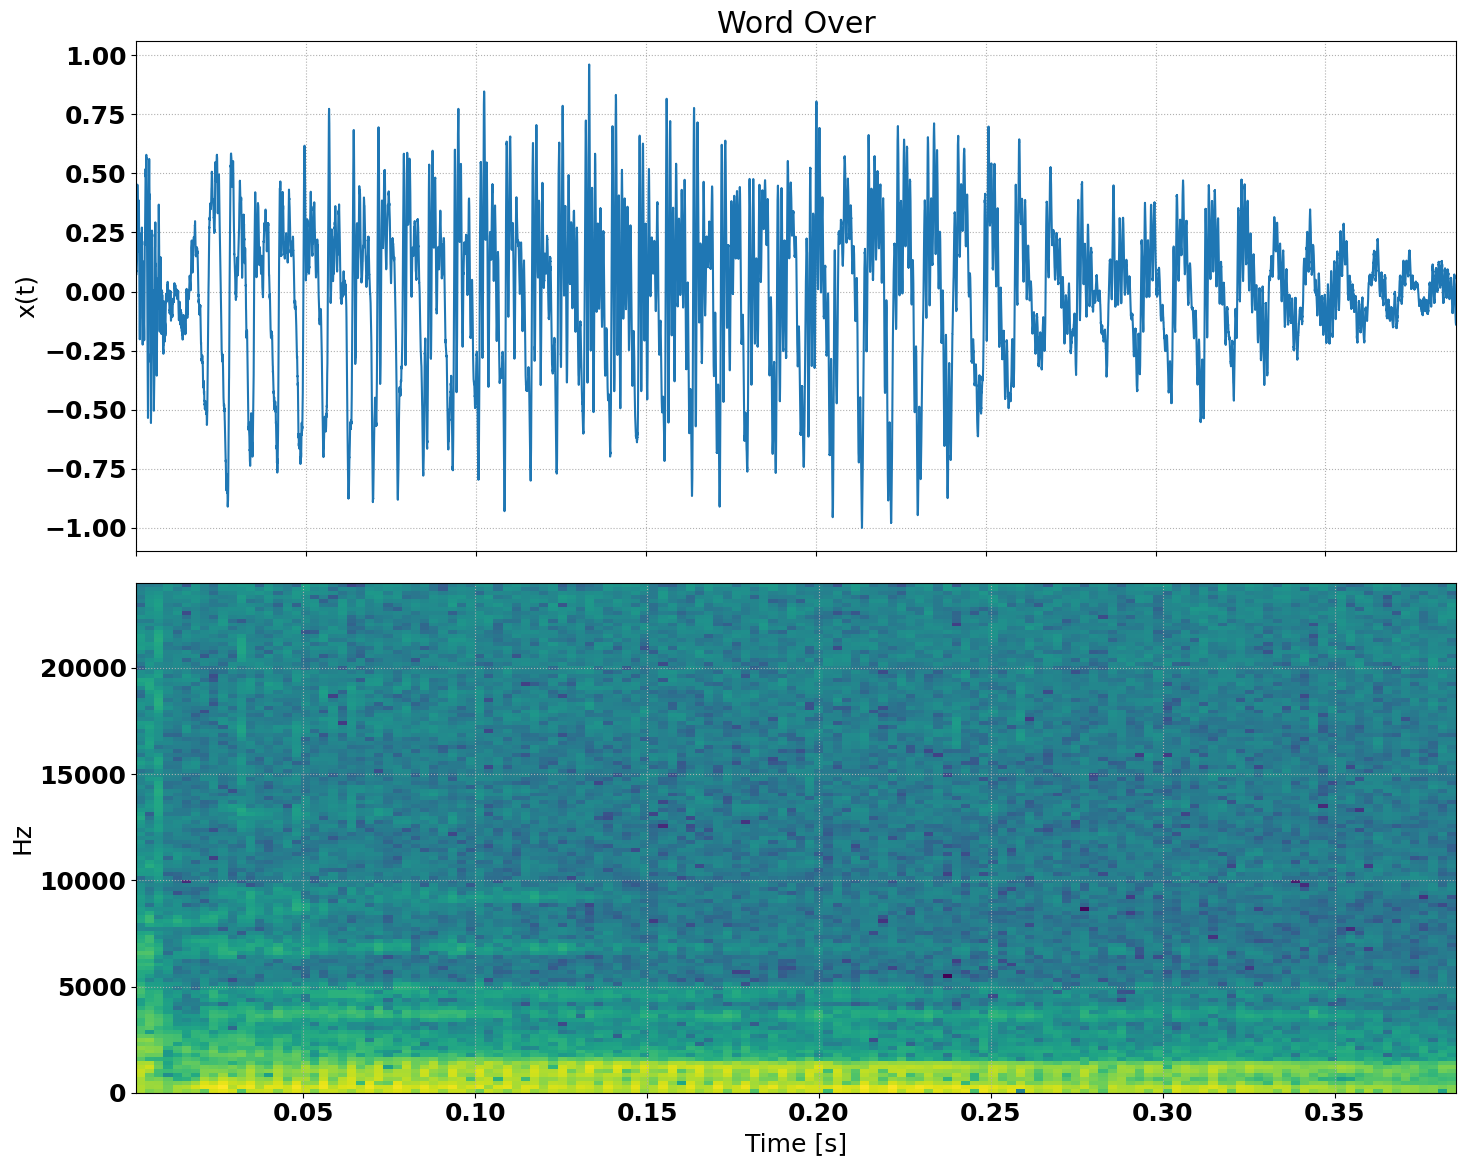

In [181]:
plot_signal(t_over, normalized_over, title="Word Over")

In [184]:
sd.play(normalized_over, fs)

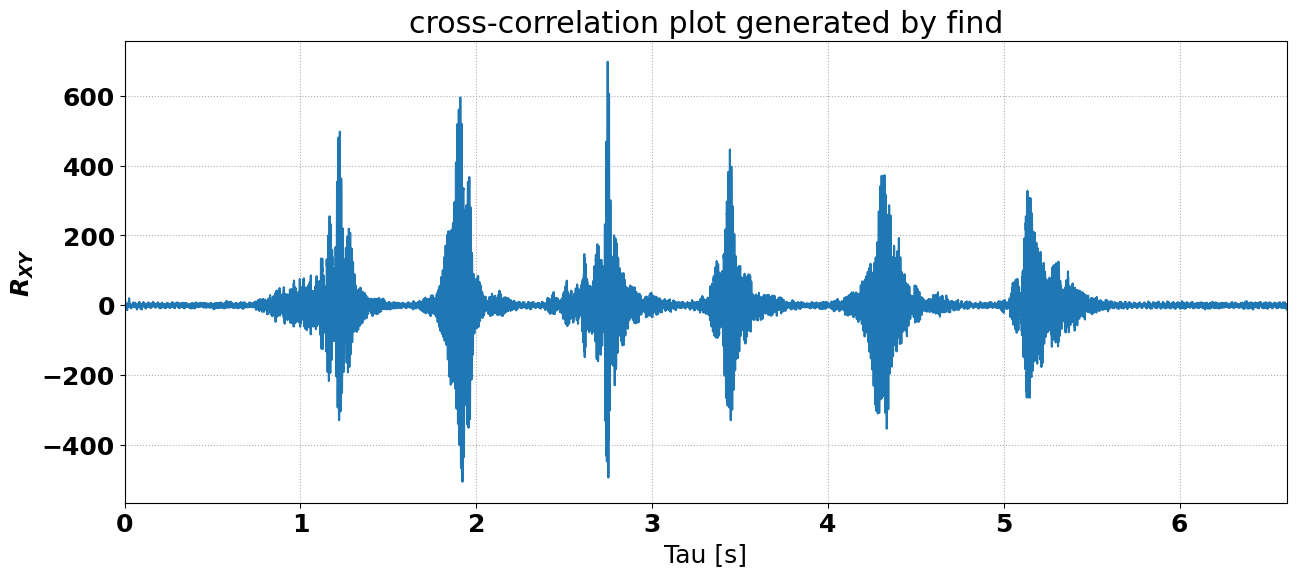

Start Time of the word Over relative to the beginning of the recording: 2.747562 seconds


In [183]:
t_first_word = find_timing_of(normalized_over, normalized_sentence, fs)
print("Start Time of the word Over relative to the beginning of the recording: {:f} seconds".format(t_first_word))